In [147]:
#libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [149]:
#load n preprocess
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=10000)

In [151]:
#pad seq
x_train= pad_sequences(x_train,maxlen=200)
x_test= pad_sequences(x_test,maxlen=200)

In [153]:
#build
model=Sequential([
    Embedding(10000,32,input_length=200),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')    
])
    

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [155]:
#compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [157]:
#train
history=model.fit(
    x_train,y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5630 - loss: 0.6764 - val_accuracy: 0.7702 - val_loss: 0.5011
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8098 - loss: 0.4194 - val_accuracy: 0.8018 - val_loss: 0.4557
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9038 - loss: 0.2482 - val_accuracy: 0.8076 - val_loss: 0.4809
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9676 - loss: 0.1049 - val_accuracy: 0.8062 - val_loss: 0.5673
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9911 - loss: 0.0421 - val_accuracy: 0.7920 - val_loss: 0.6746


In [159]:
#evaluate
loss,acc= model.evaluate(x_test,y_test)
print(f"Accuracy score:{acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7823 - loss: 0.6711
Accuracy score:0.7872


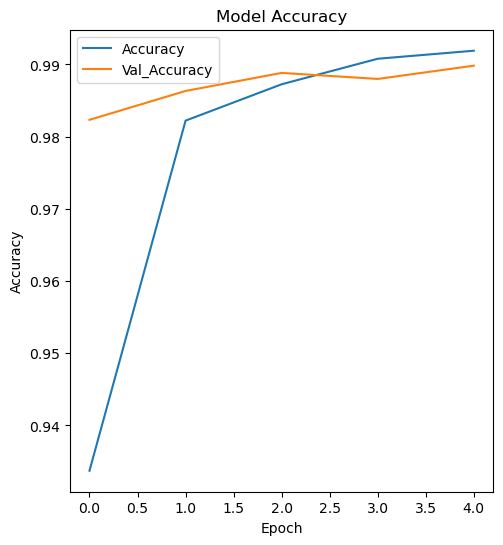

In [141]:
#visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label=['Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Val_Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

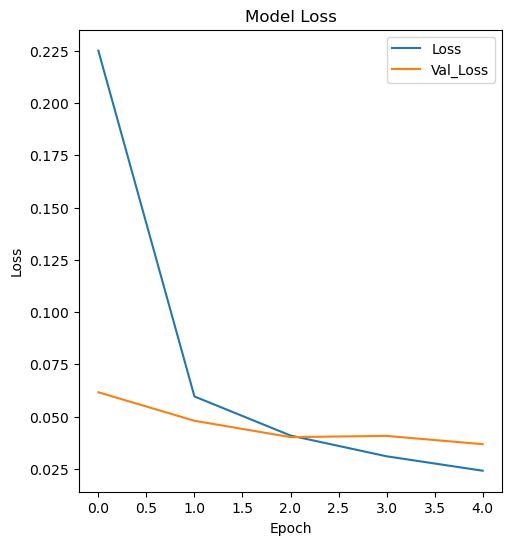

In [145]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label=['Loss'])
plt.plot(history.history['val_loss'],label=['Val_Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()